In [2]:
from tpch_polars import run_thread
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import io
import plotly
import time
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from IPython.display import clear_output

In [17]:
def visualization():
    result = run_thread("q1",1, "../../resources/tpc-h/data/scale=1/partition=10")

    for record in result:
        buf = io.StringIO(record)
        tmp = pl.read_json(buf)
        df = tmp.to_pandas()
        curFlag = df['l_returnflag'].tolist()
        curLine = df['l_linestatus'].tolist()
        avg_pr = df['avg_price'].tolist()
        ls = len(curFlag)
        df['l_returnflag,l_linestatus'] = "(" +df['l_returnflag']+","+df['l_linestatus'] +")"
        x_axis = df['l_returnflag,l_linestatus'].tolist()
        lb = np.array(avg_pr).min()-500
        ub = np.array(avg_pr).max()+500
        clear_output(wait=True)
        plt.figure(figsize=(10,8))
        plt.bar(x_axis,avg_pr)
        plt.title('Bar Chart of average price grouped by (return_flag,line_status) ')
        plt.xlabel('(l_returnflag,l_linestatus)')
        plt.ylabel('average price')
        plt.ylim(lb,ub)
        plt.show()
        time.sleep(0.5)
        plt.pause(0.5)

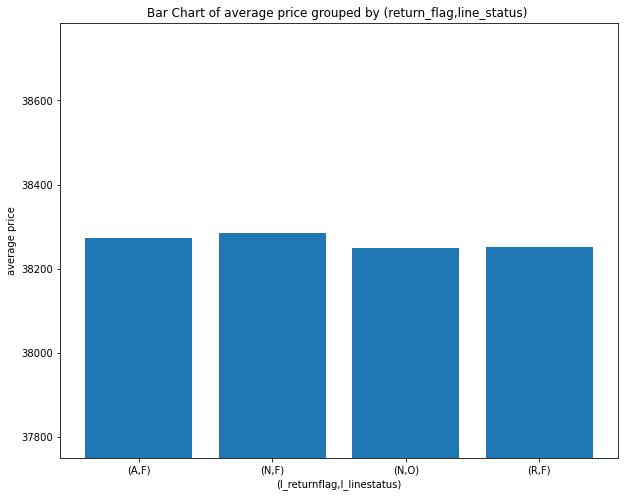

In [18]:
visualization()